<a href="https://colab.research.google.com/github/Jingut/EX/blob/main/Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# Step 1. 스티커 구하기 or 만들기

- 고양이 수염 이미지를 다운로드 받아주세요.

- 여러분의 셀카 이미지도 촬영해 주세요.

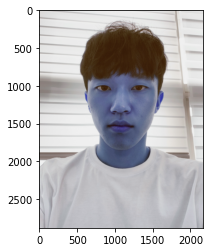

In [2]:
my_face_path = '/content/drive/MyDrive/sticker_image/images/IMG_2518.jpg' # 얼굴이미지
img_bgr = cv2.imread(my_face_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

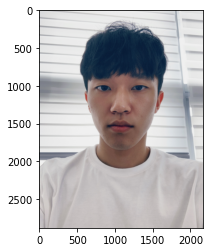

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Step 2. 얼굴 검출 & 랜드마크 검출 하기
- 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [4]:
detector_hog = dlib.get_frontal_face_detector() # detector 선언

In [5]:
print(type(detector_hog))

<class '_dlib_pybind11.fhog_object_detector'>


In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

<class '_dlib_pybind11.rectangles'>


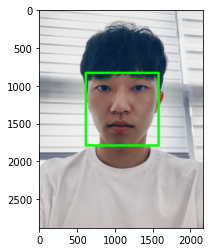

In [7]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(type(dlib_rects))   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 30, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
model_path = '/content/drive/MyDrive/sticker_image/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) # landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.

In [9]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [10]:
points.parts()[0].x

629

In [11]:
'''class Point :
  x = 3
  y = 2

tmp = Point()

tmp.x'''

'class Point :\n  x = 3\n  y = 2\n\ntmp = Point()\n\ntmp.x'

#Step 3. 스티커 적용 위치 확인하기
- 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

- 코 끝인 33 번보다 좋은 위치가 있을 거예요.

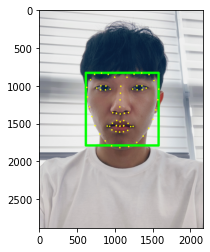

In [12]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1065, 1818)
(x,y) : (1065,1818)
(w,h) : (959,959)


In [14]:
sticker_path = '/content/drive/MyDrive/sticker_image/images/moustache1.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(959, 959, 3)


In [15]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (586,859)


In [16]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (586,859)


In [17]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)

#Step 4. 스티커 적용하기

- 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

- 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

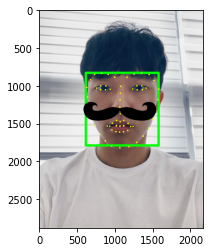

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

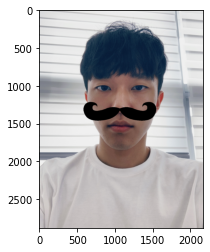

In [19]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Step 5. 문제점 찾아보기

- 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

- 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!



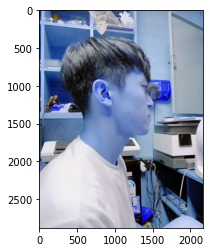

In [20]:
my_face_path_side = '/content/drive/MyDrive/side.jpg' # 얼굴이미지
img_bgr_side = cv2.imread(my_face_path_side)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr_side.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr_side)
plt.show()

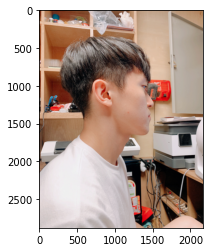

In [21]:
img_rgb_side = cv2.cvtColor(img_bgr_side, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_side)
plt.show()

In [22]:
img_rgb_side = cv2.cvtColor(img_bgr_side, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb_side, 1)   # (image, num of image pyramid)

<class '_dlib_pybind11.rectangles'>


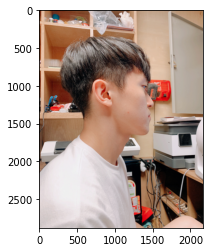

In [23]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(type(dlib_rects))   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 30, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [24]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

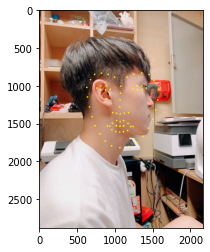

In [25]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [26]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

In [27]:
sticker_path = '/content/drive/MyDrive/sticker_image/images/moustache1.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(959, 959, 3)


In [28]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (586,859)


In [29]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (586,859)


In [30]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)

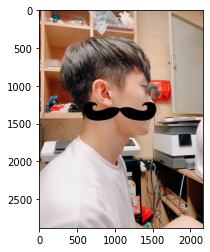

In [31]:
sticker_area = img_bgr_side[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr_side[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_side, cv2.COLOR_BGR2RGB))
plt.show()

#누웠을 때


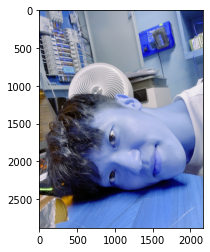

In [32]:
my_face_path_lay = '/content/drive/MyDrive/lay.jpg' # 얼굴이미지
img_bgr_lay = cv2.imread(my_face_path_lay)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr_lay.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr_lay)
plt.show()

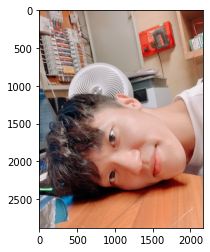

In [33]:
img_rgb_lay = cv2.cvtColor(img_bgr_lay, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_lay)
plt.show()

In [34]:
img_rgb_lay = cv2.cvtColor(img_bgr_lay, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb_lay, 1)   # (image, num of image pyramid)

<class '_dlib_pybind11.rectangles'>


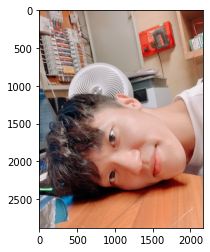

In [35]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(type(dlib_rects))   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 30, lineType=cv2.LINE_AA)

img_show_rgb3 =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb3)
plt.show()

In [36]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

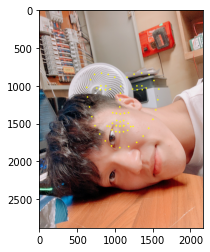

In [37]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb3 = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb3)
plt.show()

In [38]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[8])
    x = landmark[8][0]
    y = landmark[8][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

In [39]:
sticker_path = '/content/drive/MyDrive/sticker_image/images/moustache1.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(959, 959, 3)


In [40]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (586,859)


In [41]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (586,859)


In [42]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)

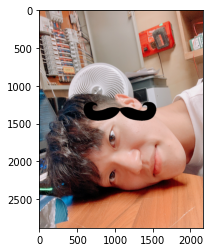

In [43]:
sticker_area = img_bgr_lay[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr_lay[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker>0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_lay, cv2.COLOR_BGR2RGB))
plt.show()

# 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
실행 속도가 중요할까요?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?

# 질문에 대한 나의 생각

### 1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

- 고개를 y축 기준으로 돌린다면 이미지 길이가 축소되어 보여야 하고, x축 기준으로 고개를 돌린다면 이미지의 높이가 축소되어 보여야 한다고 생각합니다.  


---

### 2. 멀리서 촬영하면 왜 안될까요?


- 너무 멀리서 촬영하게 되면 전체적인 얼굴 좌표 간의 간격이 미세해지고 랜드마크를 검출하기 어려워진다고 생각합니다.

---


### 3. 옆으로 누워서 촬영하면 왜 안될까요?


- 정방향의 얼굴이미지가 아닌 누운 채로의 사진은 가로세로의 랜드마크가 좌표평면 상에서 90도 회전을 하기 때문에 따로 설정을 해주지 않는 이상 랜드마크를 탐지해내기 힘들다고 생각합니다.

---



### 4. 실행 속도가 중요할까요?


- 오늘 처럼 일반사진에 적용하는 것이 아닌 동영상이나 리얼타임으로 구현한다고 했을 때 미세한 프레임 단위로 빠르게 감지해야만이 사용자의 움직임을 따라갈 수 있다고 생각해서 실행속도는 중요하다고 생각합니다.


---

### 5. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?



- 정확도가 좋지 못하다는 말은 인식되어야할 위치에 인식이 되지 않는다는 말이고 그말은 스티커 프로그램으로 써의 역할을 수행하지못하기 때문에 실행 속도보다도 중요하다고 생각합니다.

# 결론


이번 프로젝트에서는 cv의 dlib라이브러리를 이용하여 본인의 얼굴 사진에 직접 이미지를 적용해보는 프로그램을 구현해보았습니다.

shape_predictor_68_face_landmarks.dat를 로드하여 얼굴에서 68개의 랜드마크를 추출하여 그 좌표 값을 토대로 cv.rectangle()로 바운딩 박스를 설정하여 얼굴이 잘 인식되었는지 확인하였고 무료이미지 사이트에서 가져온 여러 스티커 이미지를 위치에 맞게 얼굴사진에 합성시켜보는 등의 프로젝트를 진행해보았습니다.

# 회고

---



## - 이번 프로젝트에서 어려웠던 점
처음에는 np.where에 대한 이해가 부족하여 외부에서 여러가지 방법으로 이미지를 전처리 해보았었습니다 cv2.grab을 이용해 배경을 제거하여 넣어보기도하고 아예 구글에서 누끼를 따는등 하얀 배경을 제거하기 위해 별 짓을 다해보았지만 결국에는 np.where를 이용하여 img_sticker
의 범위를 배경인 0보다 큰것만 출력하게 해주어야 배경이 제거된다는 사실을 알았고 코드가 좀 복잡하여 이해하는데에 시간이 좀 걸렸습니다.



---


## - 프로젝트를 진행하면서 알게된 점
opencv가 이미지를 받아 들일때 rgb와는 반대로 grb순으로 받아들여 서로 반대로 이미지 색상을 출력한다는 것을 알게되었고 이로인해 cv를 이용하여 이미지 전처리 시에는 반드시 cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 이미지 컨버터를 이용하여 후처리 해주어야 한다는 것을 알았습니다. 



---


## - 루브릭 평가지표를 맞추기 위해 시도한 것들
LMS에서 제시해준 고양이 수염은 너무 얇아서 인지 몰라도 경계가 깔끔하게 배경과 분리되어 나오지 않고 조금 수염이 손실?된 채로 출력이 되었어서 img_sticker 경계값을 바꾸어 보았지만 별 소득은 없었습니다. 

그래서 저는 하나의 통일된 스티커 이미지로 바꿔서 적용해보았고 나쁘지 않게 적용되는 것을 볼 수 있었습니다. 

---


## - 자기다짐
cv를 하려면 좌표에 대한 이해가 더 필요하다고 느꼈습니다.


cv관련 도큐멘트를 많이 찾아서 공부해야겠다고 느꼈습니다.


수식에 약하다고 느껴서 개인적인 공부를 조금 더 해볼 의향이 생겼습니다.